In [96]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,SGDRegressor,Ridge
import torch
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt

In [261]:
# 导入数据集
qx = pd.read_csv("./test.csv")
# 34789    51%
data = qx.iloc[:,[1,2,3,4,7,8,9,10]].values
# data = data[:3000]
# print(np.isnan(data))
target = qx.iloc[:,11].values

# target = target[:3000]
print(data.shape)
print(target[:5])
# print(np.isnan(data).any())
# qx.isnull().any()
print(data[0])


(8345, 8)
[4 4 3 7 4]
[  -1.7  335.     2.4   17.    12.    18.    37.     0.5]


In [98]:
x_train,x_test,y_train,y_test = train_test_split(data,target,test_size=0.25,random_state=1)
# 特征工程
print(y_train[:10])
print(x_train[0])
std_x = StandardScaler()
x_train = std_x.fit_transform(x_train)
x_test = std_x.transform(x_test)
std_y = StandardScaler()
y_train = std_y.fit_transform(y_train.reshape(-1,1))
y_test = std_y.transform(y_test.reshape(-1,1))
print(x_train[0])
# 还原数据
# x_train = std_x.inverse_transform(x_train)
# print(x_train[0])

[68 53  5 12 36 92 12 31 14  8]
[  24.6  205.     7.9   89.     2.    33.    85.     0.5]
[ 0.97132644  0.4127463   4.58554469  1.36816203 -0.4981043  -0.28755382
  0.52257354 -0.04919522]


D:\anaconda\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [99]:
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)
print("训练集准确率：",lin_reg.score(x_train,y_train))
print("测试集准确率：",lin_reg.score(x_test,y_test))
print(lin_reg.coef_,lin_reg.intercept_)

训练集准确率： 0.514714475519
测试集准确率： 0.516607864427
[[-0.06718606  0.00743967  0.07510631  0.28701767  0.23236183  0.59421171
   0.29823991 -0.0295733 ]] [  3.20247215e-16]


### PCA

In [100]:
print(data.shape)

(8345, 8)


In [101]:
from sklearn.decomposition import PCA
pca = PCA(n_components="mle",svd_solver='full')
pca.fit(data)
print (pca.explained_variance_ratio_)
X_new = pca.transform(data)
print(pca)

[ 0.68073114  0.2131843   0.05006432  0.03723872  0.012508    0.00385021
  0.00235075]
PCA(copy=True, iterated_power='auto', n_components='mle', random_state=None,
  svd_solver='full', tol=0.0, whiten=False)


In [102]:
std_x = StandardScaler()
std_data = std_x.fit_transform(X_new)
std_y = StandardScaler()
std_target = std_y.fit_transform(target.reshape(-1,1))
x_train,x_test,y_train,y_test = train_test_split(std_data,std_target,test_size=0.25,random_state=1)
# x_train = std_x.fit_transform(x_train)
# x_test = std_x.transform(x_test)
# std_y = StandardScaler()
# y_train = std_y.fit_transform(y_train.reshape(-1,1))
# y_test = std_y.transform(y_test.reshape(-1,1))
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)
print("线性回归训练集准确率：",lin_reg.score(x_train,y_train))
print("线性回归测试集准确率：",lin_reg.score(x_test,y_test))
print(lin_reg.coef_,lin_reg.intercept_)

线性回归训练集准确率： 0.510780232668
线性回归测试集准确率： 0.511110726427
[[-0.10203307 -0.26628278 -0.60013005 -0.22763073  0.07843449 -0.03820669
   0.04426264]] [-0.00307135]


D:\anaconda\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [103]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly_features.fit_transform(x_train)
x_text_poly = poly_features.fit_transform(x_test)
lin_reg.fit(X_train_poly, y_train)
print("线性回归训练集准确率：",lin_reg.score(X_train_poly,y_train))
print("线性回归测试集准确率：",lin_reg.score(x_text_poly,y_test))
print(lin_reg.coef_,lin_reg.intercept_)

线性回归训练集准确率： 0.670458302838
线性回归测试集准确率： 0.66669296399
[[ -1.40599131e-01  -1.90369445e-01  -9.24190419e-01  -3.08820336e-01
    3.71449240e-01  -2.69412063e-01  -1.92103240e+00  -5.31310988e-02
    2.60177669e-02   5.42344215e-02   2.75364407e-02   1.14451540e-02
   -8.13484707e-03  -3.76682410e-04  -1.42810817e-02   3.64218990e-02
    8.72366799e-02   9.73489066e-02  -2.91746409e-02   5.55911932e-02
    2.43078250e-02   1.05250381e-01  -3.30936074e-02   5.94027638e-03
    7.31343914e-02  -5.18424094e-03  -3.40229035e-02   9.06574342e-03
    2.20309150e-02   7.19146879e-03   1.03919980e-02  -3.58981149e-02
    3.83017076e-03   3.90024430e-02   1.14171986e-01]] [-0.08123969]


In [104]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(x_train,y_train)
print("knn训练集准确率：",knn.score(x_train,y_train))
print("knn测试集准确率：",knn.score(x_test,y_test))
print(knn)

knn训练集准确率： 0.80547681926
knn测试集准确率： 0.691126675485
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')


### SVM 

In [105]:
from sklearn.svm import SVR
svm = SVR(C=8.0,gamma=0.3)
svm.fit(x_train,y_train)
print("svm训练集准确率：",svm.score(x_train,y_train))
print("svm测试集准确率：",svm.score(x_test,y_test))
print(svm)

D:\anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


svm训练集准确率： 0.820101870793
svm测试集准确率： 0.764544196674
SVR(C=8.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.3,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


In [107]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly_features.fit_transform(x_train)
x_text_poly = poly_features.fit_transform(x_test)
print(X_train_poly.shape)
print(x_text_poly.shape)
svm = SVR(C=8,gamma=0.02)
svm.fit(X_train_poly,y_train)
print("svm训练集准确率：",svm.score(X_train_poly,y_train))
print("svm测试集准确率：",svm.score(x_text_poly,y_test))
print(svm)

(6258, 35)
(2087, 35)


D:\anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


svm训练集准确率： 0.810418627201
svm测试集准确率： 0.744090433752
SVR(C=8, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.02,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


### 神经网络

In [108]:
from sklearn.neural_network import MLPRegressor
net = MLPRegressor(hidden_layer_sizes=(100,20,90))
net.fit(x_train,y_train)
print("神经网络训练集准确率：",net.score(x_train,y_train))
print("神经网络测试集准确率：",net.score(x_test,y_test))
print(net)

D:\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


神经网络训练集准确率： 0.817194111638
神经网络测试集准确率： 0.755711018642
MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 20, 90), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)


### 决策树

In [109]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=9,min_samples_leaf=30,random_state=0)
dt.fit(x_train,y_train)
print("训练集精度：",dt.score(x_train,y_train))
print("测试集精度：",dt.score(x_test,y_test))
print(dt)

训练集精度： 0.690809468667
测试集精度： 0.596992491128
DecisionTreeRegressor(criterion='mse', max_depth=9, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=30,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')


In [110]:
# # 绘制决策树
# from sklearn.tree import export_graphviz
# from sklearn.externals.six import StringIO
# import pydotplus
# from io import StringIO
# dot_data = StringIO()

# export_graphviz(dt, out_file=dot_data,  # 绘制决策树
#     feature_names=wine.feature_names,
#     class_names=wine.target_names,
#     filled=True, rounded=True,
#     special_characters=True)
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
# graph.write_pdf("lur.pdf")

### 随机森林

In [111]:
from sklearn.ensemble import RandomForestRegressor
randforst = RandomForestRegressor(max_depth=9,min_samples_leaf=15,random_state=0)
randforst.fit(x_train,y_train)
print("随机森林训练集准确率：",randforst.score(x_train,y_train))
print("随机森林测试集准确率：",randforst.score(x_test,y_test))
print(randforst)

随机森林训练集准确率： 0.742876161721
随机森林测试集准确率： 0.659562621632
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=15, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)


D:\anaconda\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [112]:
# 神经网络模型 
models = torch.nn.Sequential(
    # 首先通过其完成从输入层到隐藏层的线性变换
    torch.nn.Linear(8,40),
    # 经过激活函数
    torch.nn.ReLU(),
    # 接着完成从隐藏层1到隐藏层2的线性变换
    torch.nn.Linear(40,30),
    # 经过激活函数
    torch.nn.ReLU(),
    # 完成从隐藏层2到隐藏层3的线性变换
    torch.nn.Linear(30,20),
    # 经过激活函数
    torch.nn.ReLU(),
    # 最后完成从隐藏层3到输出层的线性变换
    torch.nn.Linear(20,1)
)
print(models)

Sequential(
  (0): Linear(in_features=8, out_features=40, bias=True)
  (1): ReLU()
  (2): Linear(in_features=40, out_features=30, bias=True)
  (3): ReLU()
  (4): Linear(in_features=30, out_features=20, bias=True)
  (5): ReLU()
  (6): Linear(in_features=20, out_features=1, bias=True)
)


In [113]:
y_train = torch.tensor(y_train,dtype=torch.float32)
x_train = torch.tensor(x_train,dtype=torch.float32)
print(y_train[0])

tensor([0.0297])


In [114]:
epoch_n = 1000
learning_rate = 1e-1
loss_fn = torch.nn.MSELoss()
 
optimzer = torch.optim.Adam(models.parameters(),lr = learning_rate)

x_train = Variable(x_train)

#进行模型训练
for epoch in range(epoch_n):
    y_pred = models(x_train)
    loss = loss_fn(y_pred,y_train)
    print(loss.item())
#     if epoch%20 == 0:
#         print(epoch,loss.data)
    optimzer.zero_grad()
 
    loss.backward()
 
    #进行梯度更新
    optimzer.step()

RuntimeError: size mismatch, m1: [6258 x 7], m2: [8 x 40] at C:\w\1\s\windows\pytorch\aten\src\TH/generic/THTensorMath.cpp:197

In [115]:
models.eval()
y_pred = models(x_train)
print(y_pred[:10])
print(y_train[:10])
y_pred = std_y.inverse_transform(y_pred.detach().numpy())
y_train = std_y.inverse_transform(y_train)
print(y_train[:10])
print(y_pred[:10])
print((y_pred-y_train)[:20])

# print(type(y_pred))
# y_pred = y_pred.detach().numpy()
# y_train = y_train.detach().numpy()
# plt.plot(y_pred.detach().numpy(),y_train.detach().numpy())
# plt.show()

RuntimeError: size mismatch, m1: [6258 x 7], m2: [8 x 40] at C:\w\1\s\windows\pytorch\aten\src\TH/generic/THTensorMath.cpp:197

### 特征相关性分析

In [123]:
import pandas as pd
import numpy as np
qx = pd.read_csv("./test.csv")
data = qx.iloc[:,[1,2,3,4,5,7,8,9,10]].values
print(data[0])
target = qx.iloc[:,11].values
print(data.shape)
print(target.shape)

[ -1.70000000e+00   3.35000000e+02   2.40000000e+00   1.70000000e+01
   1.03070000e+03   1.20000000e+01   1.80000000e+01   3.70000000e+01
   5.00000000e-01]
(8345, 9)
(8345,)
[-1.7 '335' 2.4 17.0 1030.7 12 18 37 0.5 21 4]


In [118]:
from scipy.stats import pearsonr
print("温度相关性：",pearsonr(data[:,0],target))
print("风向相关性：",pearsonr(data[:,1],target))
print("风速相关性：",pearsonr(data[:,2],target))
print("湿度相关性：",pearsonr(data[:,3],target))
print("气压相关性：",pearsonr(data[:,4],target))
print("SO2相关性：",pearsonr(data[:,5],target))
print("NO2相关性：",pearsonr(data[:,6],target))
print("O3相关性：",pearsonr(data[:,7],target))
print("CO相关性：",pearsonr(data[:,8],target))
for i in data[:,3]:
    print(i)

温度相关性： (-0.23664917840292979, 1.4339174585463879e-106)
风向相关性： (-0.084149190600253956, 1.3647403231409549e-14)
风速相关性： (-0.19275442980919369, 1.1527452532032607e-70)
湿度相关性： (0.27506704538075494, 9.2181443139684165e-145)
气压相关性： (0.095693449324107449, 1.9440421798605407e-18)
SO2相关性： (0.44803943838306026, 0.0)
NO2相关性： (0.63547972357499494, 0.0)
O3相关性： (-0.14414236859510024, 5.5288093804590758e-40)
CO相关性： (0.16964001805335815, 6.4515195817538681e-55)
17.0
23.0
26.0
29.0
34.0
25.0
20.0
18.0
16.0
14.0
13.0
13.0
13.0
16.0
18.0
21.0
21.0
25.0
27.0
32.0
35.0
37.0
38.0
40.0
28.0
28.0
30.0
34.0
40.0
28.0
22.0
20.0
19.0
18.0
17.0
17.0
18.0
22.0
24.0
26.0
28.0
30.0
30.0
31.0
35.0
35.0
40.0
46.0
47.0
47.0
48.0
47.0
45.0
46.0
39.0
35.0
34.0
28.0
27.0
26.0
28.0
31.0
36.0
42.0
38.0
43.0
48.0
50.0
54.0
25.0
20.0
20.0
22.0
23.0
26.0
29.0
34.0
40.0
41.0
50.0
53.0
49.0
50.0
53.0
57.0
58.0
57.0
58.0
60.0
57.0
51.0
46.0
37.0
17.0
17.0
18.0
18.0
14.0
16.0
17.0
16.0
13.0
11.0
11.0
11.0
14.0
13.0
13.0
14.0
17.0
1

71.0
65.0
57.0
52.0
50.0
47.0
57.0
64.0
62.0
68.0
66.0
45.0
46.0
45.0
63.0
69.0
66.0
68.0
73.0
65.0
53.0
41.0
39.0
35.0
41.0
35.0
37.0
37.0
38.0
40.0
48.0
52.0
57.0
56.0
59.0
62.0
67.0
70.0
69.0
68.0
70.0
67.0
71.0
69.0
63.0
52.0
50.0
47.0
44.0
42.0
39.0
38.0
41.0
41.0
44.0
49.0
53.0
55.0
56.0
59.0
62.0
62.0
67.0
68.0
69.0
70.0
66.0
43.0
19.0
17.0
17.0
16.0
14.0
14.0
15.0
16.0
15.0
16.0
20.0
23.0
23.0
22.0
22.0
24.0
23.0
24.0
25.0
27.0
28.0
27.0
30.0
29.0
27.0
25.0
24.0
22.0
20.0
18.0
17.0
15.0
17.0
17.0
18.0
20.0
26.0
29.0
36.0
38.0
39.0
44.0
27.0
28.0
32.0
29.0
22.0
19.0
18.0
13.0
13.0
13.0
14.0
14.0
15.0
16.0
18.0
22.0
27.0
32.0
33.0
37.0
40.0
45.0
51.0
55.0
60.0
62.0
64.0
60.0
53.0
42.0
36.0
32.0
32.0
36.0
42.0
46.0
51.0
50.0
51.0
58.0
61.0
61.0
61.0
59.0
60.0
64.0
67.0
70.0
74.0
72.0
74.0
70.0
63.0
54.0
50.0
51.0
48.0
44.0
39.0
40.0
38.0
40.0
45.0
54.0
61.0
64.0
67.0
71.0
77.0
82.0
86.0
90.0
93.0
94.0
94.0
94.0
82.0
73.0
67.0
58.0
47.0
33.0
30.0
30.0
26.0
28.0
32.0
32.0
41.0
43.0


55.0
62.0
65.0
67.0
64.0
55.0
48.0
46.0
42.0
40.0
40.0
38.0
37.0
35.0
34.0
42.0
44.0
49.0
59.0
63.0
73.0
77.0
74.0
71.0
68.0
67.0
70.0
76.0
79.0
75.0
70.0
64.0
60.0
58.0
56.0
54.0
51.0
75.0
82.0
85.0
75.0
76.0
81.0
80.0
89.0
82.0
78.0
83.0
83.0
77.0
79.0
78.0
78.0
71.0
66.0
58.0
55.0
49.0
48.0
48.0
45.0
43.0
57.0
50.0
47.0
51.0
60.0
65.0
67.0
64.0
69.0
71.0
77.0
80.0
77.0
66.0
68.0
63.0
62.0
56.0
55.0
49.0
44.0
39.0
39.0
37.0
40.0
40.0
45.0
49.0
53.0
60.0
66.0
69.0
73.0
75.0
75.0
80.0
78.0
79.0
77.0
64.0
59.0
55.0
50.0
44.0
43.0
38.0
37.0
34.0
35.0
38.0
42.0
43.0
50.0
53.0
58.0
57.0
61.0
68.0
73.0
71.0
77.0
75.0
68.0
59.0
54.0
51.0
49.0
46.0
40.0
38.0
34.0
33.0
36.0
42.0
44.0
48.0
52.0
57.0
65.0
66.0
72.0
74.0
75.0
78.0
82.0
87.0
87.0
68.0
57.0
51.0
46.0
43.0
39.0
36.0
31.0
33.0
28.0
30.0
41.0
52.0
65.0
62.0
59.0
61.0
64.0
67.0
58.0
79.0
87.0
80.0
87.0
73.0
65.0
58.0
49.0
45.0
44.0
46.0
45.0
48.0
46.0
44.0
43.0
47.0
52.0
55.0
64.0
71.0
75.0
80.0
72.0
74.0
75.0
72.0
79.0
77.0
71.0
70.0


In [20]:
x = np.random.uniform(-1, 1, 100000)
print (pearsonr(x, x**2))

(-0.0024802930421721301, 0.43284712852063889)


In [29]:
qx = pd.read_excel("./昌平2015大气.xlsx")
data  = qx.iloc[:,[10]].values
target = qx.iloc[:,[11]].values
print(data.shape)
print(target.shape)
# print("P10相关性：",data,target)

(8469, 1)
(8469, 1)


### 加入p10的新数据集

In [343]:
qx = pd.read_csv("./test1.csv")
print(qx.shape)
print(type(qx))
data = qx.iloc[:,[1,2,3,4,5,7,8,9,10,11,12]].values
print(type(data))
# print(np.isnan(data[:,5]))
data_1=[]
# 数据清洗--删除数据中的”PPC“值
for data_0 in data:
    if (data_0[1]!="PPC"):
        data_0[1] = float(data_0[1])
        data_1.append(data_0)
data_1 = np.array(data_1)
print(data_1.shape)
print(data_1[0])
data_d = data_1[:,0:10]
data_t = data_1[:,10]
print(data_d[0])
print(data_t[0])
# from scipy.stats import pearsonr
# print("温度相关性：",pearsonr(data_d[:,0],data_t))
# print("风向相关性：",pearsonr(data_d[:,1],data_t))
# print("风速相关性：",pearsonr(data_d[:,2],data_t))
# print("湿度相关性：",pearsonr(data_d[:,3],data_t))
# print("气压相关性：",pearsonr(data_d[:,4],data_t))
# print("SO2相关性：",pearsonr(data_d[:,5],data_t))
# print("NO2相关性：",pearsonr(data_d[:,6],data_t))
# print("O3相关性：",pearsonr(data_d[:,7],data_t))
# print("CO相关性：",pearsonr(data_d[:,8],data_t))
# print("CO相关性：",pearsonr(data_d[:,9],data_t))


(8469, 13)
<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
(8346, 11)
[-1.7 335.0 2.4 17.0 1030.7 12 18 37 0.5 21 4]
[-1.7 335.0 2.4 17.0 1030.7 12 18 37 0.5 21]
4


In [265]:
from sklearn.linear_model import LinearRegression
line = LinearRegression()
qx = pd.read_csv("./my_csv.csv",header=-1)
data = qx.values
data_x = data[:,0:10]
data_y = data[:,10]
# 把ndarray数据类型变为dataframe
# df = pd.DataFrame(data_1)
# 把dataframe数据类型变为ndarray
# data = qx.values
# 向csv中写入数据
# df.to_csv('my_csv.csv', header=False)

line.fit(data_x,data_y)
print(line.score(data_x,data_y))
# t = 0
# for i in data_d:
#     print(t)
#     print(i)
#     t += 1
# ceshi = data_d[:,[3,4]]
# print(ceshi.shape)
# print(ceshi[0])
# np.isnan(ceshi)
print("温度相关性：",pearsonr(data_x[:,0],data_y))
print("风向相关性：",pearsonr(data_x[:,1],data_y))
print("风速相关性：",pearsonr(data_x[:,2],data_y))
print("湿度相关性：",pearsonr(data_x[:,3],data_y))
print("气压相关性：",pearsonr(data_x[:,4],data_y))
print("SO2相关性：",pearsonr(data_x[:,5],data_y))
print("NO2相关性：",pearsonr(data_x[:,6],data_y))
print("O3相关性：",pearsonr(data_x[:,7],data_y))
print("CO相关性：",pearsonr(data_x[:,8],data_y))
print("P10相关性：",pearsonr(data_x[:,9],data_y))

0.609206021933
温度相关性： (-0.23664917840292979, 1.4339174585463879e-106)
风向相关性： (-0.084149190600253956, 1.3647403231409549e-14)
风速相关性： (-0.19275442980919369, 1.1527452532032607e-70)
湿度相关性： (0.27506704538075494, 9.2181443139684165e-145)
气压相关性： (0.095693449324107449, 1.9440421798605407e-18)
SO2相关性： (0.44803943838306026, 0.0)
NO2相关性： (0.63547972357499494, 0.0)
O3相关性： (-0.14414236859510024, 5.5288093804590758e-40)
CO相关性： (0.16964001805335815, 6.4515195817538681e-55)
P10相关性： (0.5425888673666307, 0.0)


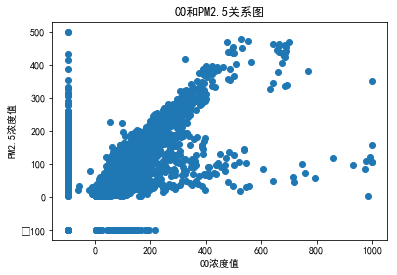

-99.0
-99.0
-99.0
-99.0
-99.0
-99.0
-99.0
-99.0
-99.0
-99.0
-99.0
-99.0
-99.0
-99.0
-99.0
-99.0
-99.0
-99.0
-99.0
-99.0
-99.0
-99.0
-99.0
-99.0
-99.0
-99.0
-99.0
-99.0
-99.0
-99.0
-99.0
-99.0
-99.0
-99.0
-99.0
-99.0
-99.0
-99.0
-99.0
-99.0
-99.0
-99.0
-99.0
-99.0
-99.0
-99.0
-99.0
-99.0
-99.0
-99.0
-99.0
-99.0
-99.0
-99.0
-99.0
-99.0
-99.0
-99.0
-99.0
-99.0
-99.0
-99.0
-99.0
-99.0
-99.0
-99.0
-99.0
-99.0
-99.0
-99.0
-99.0
-99.0
-99.0
-99.0
-99.0
-99.0
-99.0
-99.0
-99.0
-99.0
-99.0
-99.0
-99.0
-99.0
-99.0
-99.0
-99.0
-99.0
-99.0
-99.0
-99.0
-99.0
-99.0
-99.0
-99.0
-99.0
-99.0
-99.0
-99.0
-99.0
-99.0
-99.0
-99.0
-99.0
-99.0
-99.0
-99.0
-99.0
-99.0
-99.0
-99.0
-99.0
-99.0
-99.0
-99.0
-99.0
-99.0
-99.0
-99.0
-99.0
-99.0
-99.0
-99.0
-99.0
-99.0
-99.0
-99.0
-99.0
-99.0
-99.0
-99.0
-99.0
-99.0
-99.0
-99.0
-99.0
-99.0
-99.0
-99.0
-99.0
-99.0
-99.0
-99.0
-99.0
-99.0
-99.0
-99.0
-99.0
-99.0
-99.0
-99.0
-99.0
-99.0
-99.0
-99.0
-99.0
-99.0
-99.0
-99.0
-99.0
-99.0
-99.0
-99.0
-99.0
-99.0
-99.0
-99.

In [341]:
from matplotlib import pyplot as plt
from pylab import *
mpl.rcParams['font.sans-serif'] = ['SimHei']
plt.scatter(data_x[:,9],data_y)
plt.xlabel("CO浓度值")
plt.ylabel("PM2.5浓度值",rotation=90)
plt.title("CO和PM2.5关系图")
plt.show()

for i in data_x[:,9]:
    if i<0:
        print(i)

In [272]:
x_train,x_test,y_train,y_test = train_test_split(data_x,data_y,test_size=0.25,random_state=1)
# 特征工程
print(y_train[:10])
print(x_train[0])
std_x = StandardScaler()
x_train = std_x.fit_transform(x_train)
x_test = std_x.transform(x_test)
std_y = StandardScaler()
y_train = std_y.fit_transform(y_train.reshape(-1,1))
y_test = std_y.transform(y_test.reshape(-1,1))
print(x_train[0])

[ 68.  53.   5.  12.  36.  92.  12.  31.  14.   8.]
[  2.46000000e+01   2.05000000e+02   7.90000000e+00   8.90000000e+01
   9.98900000e+02   2.00000000e+00   3.30000000e+01   8.50000000e+01
   5.00000000e-01  -9.90000000e+01]
[ 0.97132644  0.4127463   4.58554469  1.36816203 -1.37517048 -0.4981043
 -0.28755382  0.52257354 -0.04919522 -1.27230578]


In [274]:
from sklearn.linear_model import LinearRegression
line = LinearRegression()
line.fit(x_train,y_train)
print("线性回归训练集准确率：",line.score(x_train,y_train))
print("线性回归测试集准确率：",line.score(x_test,y_test))

线性回归训练集准确率： 0.610366848942
线性回归测试集准确率： 0.605222941784


In [283]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly_features.fit_transform(x_train)
x_text_poly = poly_features.fit_transform(x_test)
lin_reg.fit(X_train_poly, y_train)
print("线性回归训练集准确率：",lin_reg.score(X_train_poly,y_train))
print("线性回归测试集准确率：",lin_reg.score(x_text_poly,y_test))
print(lin_reg.coef_,lin_reg.intercept_)

线性回归训练集准确率： 0.717536219102
线性回归测试集准确率： 0.647019083885
[[ -1.83821375e-02   8.84193403e-03   4.25323215e-02   2.29501296e-01
   -3.64970593e-02   2.02074664e-01   2.37857934e-01   1.80329158e-01
    1.62818916e+00   2.11185402e-01  -7.07092647e-02   1.51225534e-02
    4.72303415e-02  -2.63777905e-02  -1.62964010e-01   9.92765973e-02
   -2.71550521e-02  -6.20530840e-02   7.14028601e-02  -3.17624805e-02
   -4.28477031e-02   1.51844375e-02   5.57662008e-03   9.49604202e-03
    1.04582214e-02   3.70475653e-03  -1.99762686e-04   9.50326865e-03
   -3.95243385e-02  -4.69049230e-03  -1.02976193e-02   3.26661159e-02
   -2.23130855e-02   6.06867889e-02  -3.59983853e-02   1.58721335e-03
   -1.58270741e-02   1.72899911e-02  -4.98724036e-02   4.97855782e-02
    4.41306123e-02   2.74438200e-02   3.47523817e-02   4.21727171e-02
   -7.96806647e-02   8.27983395e-02   7.56609831e-03  -2.31070726e-02
    8.12718607e-02  -6.38486532e-02   3.38363566e-03  -2.70528299e-02
    6.62056160e-02   7.61141372e-02 

In [275]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(x_train,y_train)
print("knn训练集准确率：",knn.score(x_train,y_train))
print("knn测试集准确率：",knn.score(x_test,y_test))

knn训练集准确率： 0.864863001295
knn测试集准确率： 0.767532676108


In [302]:
from sklearn.svm import SVR
svm = SVR(C=10.0,gamma=0.1)
svm.fit(x_train,y_train)
print("svm训练集准确率：",svm.score(x_train,y_train))
print("svm测试集准确率：",svm.score(x_test,y_test))
print(svm)

D:\anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


svm训练集准确率： 0.865825079809
svm测试集准确率： 0.811351107684
SVR(C=10.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


In [279]:
from sklearn.neural_network import MLPRegressor
net = MLPRegressor(hidden_layer_sizes=(100,10,100))
net.fit(x_train,y_train)
print("神经网络训练集准确率：",net.score(x_train,y_train))
print("神经网络测试集准确率：",net.score(x_test,y_test))
print(net)

D:\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


神经网络训练集准确率： 0.858628245948
神经网络测试集准确率： 0.807457931924
MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 10, 100), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)


In [280]:
from sklearn.ensemble import RandomForestRegressor
randforst = RandomForestRegressor(max_depth=9,min_samples_leaf=15,random_state=0)
randforst.fit(x_train,y_train)
print("随机森林训练集准确率：",randforst.score(x_train,y_train))
print("随机森林测试集准确率：",randforst.score(x_test,y_test))
print(randforst)

随机森林训练集准确率： 0.85973963877
随机森林测试集准确率： 0.806105254877
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=15, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)


D:\anaconda\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


### 处理数据源种的负数问题

In [359]:
qx = pd.read_csv("./test1.csv")
print(qx.shape)
print(type(qx))
data = qx.iloc[:,[1,2,3,4,5,7,8,9,10,11,12]].values
print(type(data))
# print(np.isnan(data[:,5]))
data_1=[]
# 数据清洗--删除数据中的”PPC“值
for data_0 in data:
    if (data_0[1]!="PPC"):
        data_0[1] = float(data_0[1])
        data_1.append(data_0)
data_1 = np.array(data_1)
data_2 = []
print(data_1.shape)
print(data_1[0])
for data in data_1:
    if (data[10]!=-99)and(data[9]!=-99)and(data[8]!=-99)and(data[7]!=-99)and(data[6]!=-99)and(data[5]!=-99):
        data_2.append(data)
data_2 = np.array(data_2)


(8469, 13)
<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
(8346, 11)
[-1.7 335.0 2.4 17.0 1030.7 12 18 37 0.5 21 4]


In [363]:
print(data_2.shape)
print(data_2[0])
print(data_2[0][10])

(6354, 11)
[-1.7 335.0 2.4 17.0 1030.7 12 18 37 0.5 21 4]
4


In [367]:
# 把ndarray数据类型变为dataframe
# df = pd.DataFrame(data_2)
# 把dataframe数据类型变为ndarray
# data = qx.values
# 向csv中写入数据
# df.to_csv('my_csv.csv', header=False)

In [396]:
qx = pd.read_csv("./my_csv.csv",header=None )
print(qx.shape)
print(type(qx))
data = qx.iloc[:,1:12].values
print(type(data))
print(data[0])
data_x = data[:,0:10]
data_y = data[:,10]
print(data_x[0])
print(data_y[0])

(6353, 12)
<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
[ -1.70000000e+00   3.35000000e+02   2.40000000e+00   1.70000000e+01
   1.03070000e+03   1.20000000e+01   1.80000000e+01   3.70000000e+01
   5.00000000e-01   2.10000000e+01   4.00000000e+00]
[ -1.70000000e+00   3.35000000e+02   2.40000000e+00   1.70000000e+01
   1.03070000e+03   1.20000000e+01   1.80000000e+01   3.70000000e+01
   5.00000000e-01   2.10000000e+01]
4.0


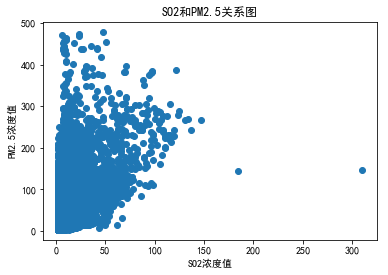

In [402]:
# 制图对比每个特征和PM2.5的关系
from matplotlib import pyplot as plt
from pylab import *
mpl.rcParams['font.sans-serif'] = ['SimHei']
plt.scatter(data_x[:,5],data_y)
plt.xlabel("SO2浓度值")
plt.ylabel("PM2.5浓度值",rotation=90)
plt.title("SO2和PM2.5关系图")
plt.show()


In [406]:
# 皮尔森相关系数分析
print("温度相关性：",pearsonr(data_x[:,0],data_y))
print("风向相关性：",pearsonr(data_x[:,1],data_y))
print("风速相关性：",pearsonr(data_x[:,2],data_y))
print("湿度相关性：",pearsonr(data_x[:,3],data_y))
print("气压相关性：",pearsonr(data_x[:,4],data_y))
print("SO2相关性：",pearsonr(data_x[:,5],data_y))
print("NO2相关性：",pearsonr(data_x[:,6],data_y))
print("O3相关性：",pearsonr(data_x[:,7],data_y))
print("CO相关性：",pearsonr(data_x[:,8],data_y))
print("P10相关性：",pearsonr(data_x[:,9],data_y))

温度相关性： (-0.25752594400916373, 8.9789201913720392e-97)
风向相关性： (-0.13599764195837824, 1.3109837430173109e-27)
风速相关性： (-0.2343750781552624, 5.1621963796999783e-80)
湿度相关性： (0.36997047730965865, 2.6846435909433861e-205)
气压相关性： (0.1094055389514508, 2.2343035555284872e-18)
SO2相关性： (0.51658866643338164, 0.0)
NO2相关性： (0.7229327656228608, 0.0)
O3相关性： (-0.16892735708706413, 6.9724508038331355e-42)
CO相关性： (0.82759259908337579, 0.0)
P10相关性： (0.80499131060917573, 0.0)


In [405]:
# 标准化
std_x = StandardScaler()
std_data = std_x.fit_transform(data_x)
std_y = StandardScaler()
std_target = std_y.fit_transform(data_y.reshape(-1,1))
x_train,x_test,y_train,y_test = train_test_split(std_data,std_target,test_size=0.25,random_state=1)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(4764, 10) (4764, 1)
(1589, 10) (1589, 1)


In [407]:
from sklearn.ensemble import RandomForestRegressor
randforst = RandomForestRegressor(max_depth=9,min_samples_leaf=15,random_state=0)
randforst.fit(x_train,y_train)
print("随机森林训练集准确率：",randforst.score(x_train,y_train))
print("随机森林测试集准确率：",randforst.score(x_test,y_test))
print(randforst)

随机森林训练集准确率： 0.946944888343
随机森林测试集准确率： 0.933033551883
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=15, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)


D:\anaconda\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [408]:
from sklearn.neural_network import MLPRegressor
net = MLPRegressor(hidden_layer_sizes=(100,20,90))
net.fit(x_train,y_train)
print("神经网络训练集准确率：",net.score(x_train,y_train))
print("神经网络测试集准确率：",net.score(x_test,y_test))
print(net)

D:\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


神经网络训练集准确率： 0.959730220786
神经网络测试集准确率： 0.949368556097
MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 20, 90), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)


In [421]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly_features.fit_transform(x_train)
x_text_poly = poly_features.fit_transform(x_test)
print(X_train_poly.shape)
print(x_text_poly.shape)
svm = SVR(C=4,gamma=0.003)
svm.fit(X_train_poly,y_train)
print("svm训练集准确率：",svm.score(X_train_poly,y_train))
print("svm测试集准确率：",svm.score(x_text_poly,y_test))
print(svm)

(4764, 65)
(1589, 65)


D:\anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


svm训练集准确率： 0.955674030993
svm测试集准确率： 0.943004941531
SVR(C=4, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.003,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


In [422]:
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)
print("线性回归训练集准确率：",lin_reg.score(x_train,y_train))
print("线性回归测试集准确率：",lin_reg.score(x_test,y_test))
print(lin_reg.coef_,lin_reg.intercept_)

线性回归训练集准确率： 0.855786144659
线性回归测试集准确率： 0.860890870116
[[ 0.00681984 -0.00964598  0.01211828  0.19359225  0.01626726  0.13530013
   0.21182898  0.20048083  0.34947769  0.38006406]] [ 0.00236102]
